In [1]:
import os
import IPython
import IPython.display
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import time
#import math
from tensorflow import keras
#import seaborn as sns

#import random
import tensorflow as tf



In [33]:
#file_str="RWs_H_g_2p2_tadv_5min"
file_str="RWs_H_g_2p2_tadv_1min_rw_0.7"

In [34]:


LSTM_save_name= "/best_LSTM_"+file_str +"checkpoint.model.keras"



In [35]:
data=np.load('DataPrepared/'+file_str+".npz")
#data=np.load(file_str+".npz")

for vars in data:
    print(vars)

wave_data_train=data["wave_data_train"]
wave_data_test=data["wave_data_test"]
label_train=data["label_train"]
label_test=data["label_test"]
num_classes=2

wave_data_train
wave_data_test
label_train
label_test


In [37]:
print(wave_data_train.shape)
print(wave_data_test.shape)


(21297, 1536, 1)
(5323, 1536, 1)


## LSTM

In [38]:
batch_size=64

In [39]:


model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.LSTM(10, input_shape = wave_data_train.shape[1:], return_sequences=True))
#model_LSTM.add(keras.layers.LSTM(10, batch_input_shape=(batch_size, n_timesteps, 1), return_sequences=True))
model_LSTM.add(keras.layers.BatchNormalization())
#model_LSTM.add(keras.layers.Dropout(0.05))
#model_LSTM.add(keras.layers.Dense(50, activation="sigmoid"))


model_LSTM.add(keras.layers.LSTM(10, return_sequences=True)) #, return_sequences=True
model_LSTM.add(keras.layers.BatchNormalization())
#model_LSTM.add(keras.layers.Dropout(0.05))
#model_LSTM.add(keras.layers.Dense(num_classes, activation="sigmoid"))


model_LSTM.add(keras.layers.LSTM(10, return_sequences=True))#, return_sequences=True
model_LSTM.add(keras.layers.BatchNormalization())
#model_LSTM.add(keras.layers.Dropout(0.05))
#model_LSTM.add(keras.layers.Dense(num_classes, activation="sigmoid"))

#model_LSTM.add(keras.layers.LSTM(10, return_sequences=True))#, return_sequences=True
#model_LSTM.add(keras.layers.BatchNormalization())
#model_LSTM.add(keras.layers.Dense(num_classes, activation="sigmoid"))
#model_LSTM.add(keras.layers.Dropout(0.05))

#model_LSTM.add(keras.layers.LSTM(10, return_sequences=True))#, return_sequences=True
#model_LSTM.add(keras.layers.BatchNormalization())
#model_LSTM.add(keras.layers.Dropout(0.05))
#model_LSTM.add(keras.layers.Dense(num_classes, activation="sigmoid"))

model_LSTM.add(keras.layers.LSTM(10))
model_LSTM.add(keras.layers.BatchNormalization())
model_LSTM.add(keras.layers.Dropout(0.05))
model_LSTM.add(keras.layers.Dense(num_classes, activation="sigmoid"))#


model_LSTM.compile(loss="sparse_categorical_crossentropy",
            metrics=["sparse_categorical_accuracy"],
            optimizer="adam")
              #optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
#, optimizer="adam")#tf.optimizers.SGD(learning_rate=0.001, momentum=0.1),) #"adam"

model_LSTM.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 1536, 10)            │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 1536, 10)            │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 1536, 10)            │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1536, 10)            │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 1536, 10)            │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1536, 10)            │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 10)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,182 (12.43 KB)

 Trainable params: 3,102 (12.12 KB)

 Non-trainable params: 80 (320.00 B)

In [43]:
import math
def scheduler(epochs, lr):
    if epochs < 5:
        return lr
    else:
        return lr * math.exp(-0.1)

In [44]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        LSTM_save_name, save_best_only=True, monitor="val_loss"#"val_sparse_categorical_accuracy"#"val_loss"
    ),
    #keras.callbacks.ReduceLROnPlateau(
    #    monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    #),
    keras.callbacks.LearningRateScheduler(scheduler),
    #keras.callbacks.LearningRateScheduler(
    #    tf.keras.optimizers.schedules.CosineDecay(
    #        0.01, #Initial lr
    #        50, #decay_steps
    #        alpha = 0.0,
    #        name = "CosDecay",
    #        warmup_target=0.001,
    #        warmup_steps=10            
    #    )
    #),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, verbose=1), #"val_loss"
]

history_LSTM=model_LSTM.fit(wave_data_train, label_train,batch_size=batch_size,   epochs=4, validation_split=0.2, callbacks=callbacks, 
          verbose=1)

Epoch 1/4
267/267 ━━━━━━━━━━━━━━━━━━━━ 660s 2s/step - loss: 0.5816 - sparse_categorical_accuracy: 0.6950 - val_loss: 0.7003 - val_sparse_categorical_accuracy: 0.6979 - learning_rate: 0.0010
Epoch 2/4
267/267 ━━━━━━━━━━━━━━━━━━━━ 664s 2s/step - loss: 0.5893 - sparse_categorical_accuracy: 0.6926 - val_loss: 0.6521 - val_sparse_categorical_accuracy: 0.6955 - learning_rate: 0.0010
Epoch 3/4
267/267 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - loss: 0.5796 - sparse_categorical_accuracy: 0.7015 - val_loss: 0.6322 - val_sparse_categorical_accuracy: 0.6244 - learning_rate: 0.0010
Epoch 4/4
267/267 ━━━━━━━━━━━━━━━━━━━━ 650s 2s/step - loss: 0.5832 - sparse_categorical_accuracy: 0.6939 - val_loss: 0.7580 - val_sparse_categorical_accuracy: 0.6979 - learning_rate: 0.0010


In [45]:

model_LSTM = keras.models.load_model(LSTM_save_name)

test_loss, test_acc = model_LSTM.evaluate(wave_data_test, label_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

167/167 ━━━━━━━━━━━━━━━━━━━━ 74s 426ms/step - loss: 0.6315 - sparse_categorical_accuracy: 0.6193
Test accuracy 0.6225812435150146
Test loss 0.6289841532707214


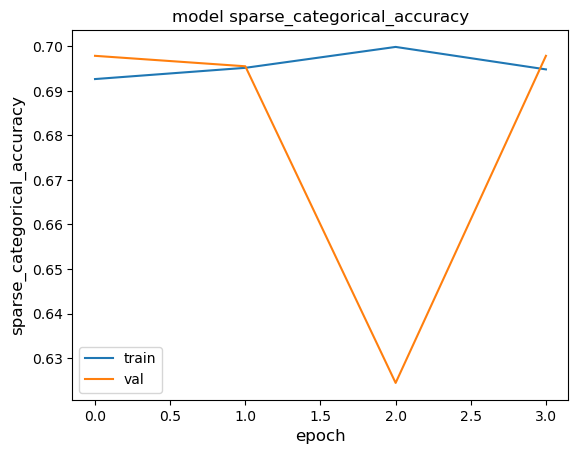

In [46]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history_LSTM.history[metric])
plt.plot(history_LSTM.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

D:\ExtremeWavesClassification/training_history_/RWs_H_g_2p2_tadv_1min_rw_0.7.jpg


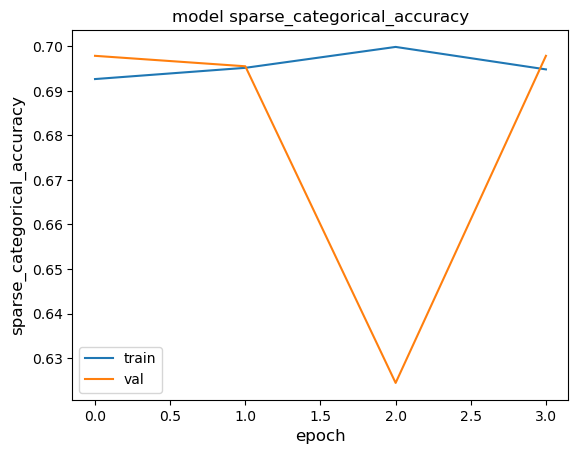

<Figure size 640x480 with 0 Axes>

In [53]:
save_history_plot=True
if save_history_plot ==True:
    plt.figure()
    plt.plot(history_LSTM.history[metric])
    plt.plot(history_LSTM.history["val_" + metric])
    plt.title("model " + metric)
    plt.ylabel(metric, fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "val"], loc="best")
    filename=os.getcwd()+'/training_history_'+'/'+file_str+'.jpg'
    print(filename)
    plt.savefig(filename,dpi=199)
    plt.show()
    plt.clf()